In [290]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as con
import matplotlib.animation as animation

from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian2DKernel

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=16)

plt.style.use("../../light_mode.mplstyle")


In [321]:
Nmesh = 256
boxsize = 30

# Load in Data

In [322]:
#from lamar
# x = np.genfromtxt('../src/outputs/v3/x.dat')
# y = np.genfromtxt('../src/outputs/v3/y.dat')

x = np.genfromtxt('../src/outputs/x.dat')
y = np.genfromtxt('../src/outputs/y.dat')

# vx = np.genfromtxt('../src/outputs/vx.dat')
# vy = np.genfromtxt('../src/outputs/vy.dat')

# m = np.genfromtxt('../src/outputs/m.dat')

In [323]:
x.shape

(101, 4000)

# Make Frames

In [330]:
def make_frame(i):

    #make a 2D histogram of the particles
    im, _, _ = np.histogram2d(x[i]/1000, y[i]/1000, 
                   bins=(np.linspace(-boxsize/2, boxsize/2, Nmesh), 
                         np.linspace(-boxsize/2, boxsize/2, Nmesh)), 
                   density=True)

    #convolve this with gaussian kernel
    gauss = Gaussian2DKernel(x_stddev=3.5, y_stddev=3.5)
    im_smooth = convolve_fft(im, gauss)
    
    return im_smooth

In [331]:
frames = []
for i in range(0, x.shape[0], 1):
    frames.append(make_frame(i))

[]

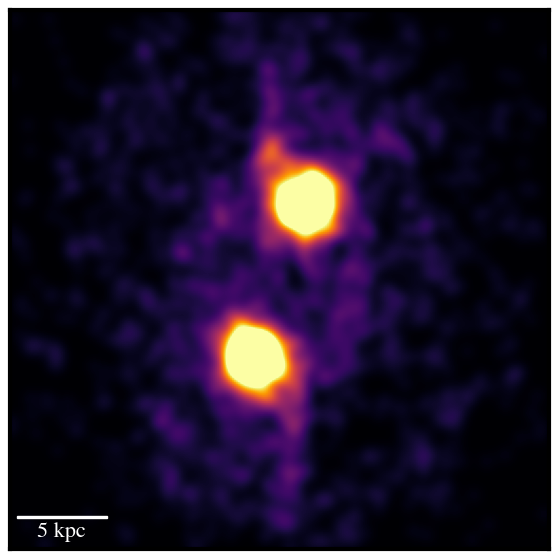

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# vmin, vmax = 0.0, 10.5


im = ax.imshow(frames[28], vmin=0, vmax=0.01, 
               cmap="inferno", origin='lower',
               extent=(-boxsize/2, boxsize/2,
                       -boxsize/2, boxsize/2)) 

scalebar0 = AnchoredSizeBar(ax.transData,
                           5, '5 kpc', 'lower left', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=0.15,
                           fontproperties=fontprops, sep=3)
ax.add_artist(scalebar0)

ax.set_xticks([]) ; ax.set_yticks([])
# plt.savefig("spiral_disk.png", dpi=300, bbox_inches="tight")
# ax.set_xlabel(r'$x$ [${\rm kpc}$]')
# ax.set_ylabel(r'$y$ [${\rm kpc}$]')

# Animate

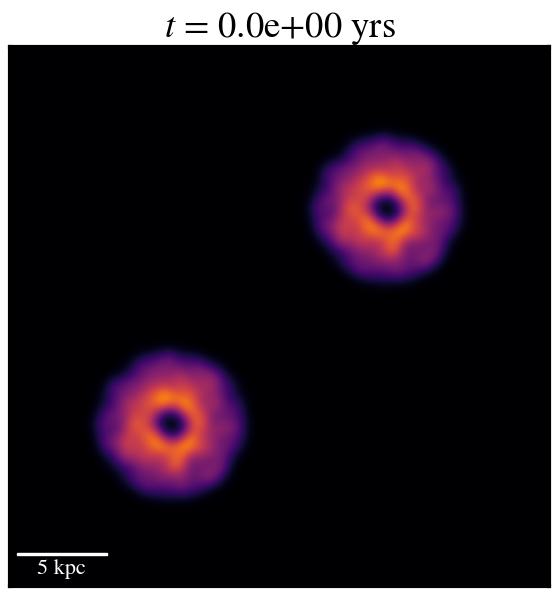

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

vmin, vmax = 0.0, 0.025
Nframes = len(frames)
dt = 1e6

# div = make_axes_locatable(ax)
# cax = div.append_axes('right', '5%', '5%')


im = ax.imshow(frames[0], vmin=vmin, vmax=vmax, 
               cmap="inferno", origin='lower',
               extent=(-boxsize/2, boxsize/2,
                       -boxsize/2, boxsize/2)) 
# cb = fig.colorbar(im, cax=cax)
tx = ax.set_title(f"$t$ = {dt * 0:0.1e} yrs")
# ax.set_xlabel(r'$x$ [${\rm kpc}$]')
# ax.set_ylabel(r'$y$ [${\rm kpc}$]')
ax.set_xticks([]) ; ax.set_yticks([])
# cb.set_label(r'$x_{\rm HII}$')

scalebar0 = AnchoredSizeBar(ax.transData,
                           5, '5 kpc', 'lower left', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=0.15,
                           fontproperties=fontprops, sep=3)
ax.add_artist(scalebar0)

def animate(i):
    arr = frames[i]
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text(f"$t$ = {dt * i:0.1e} yrs")


ani = animation.FuncAnimation(fig, animate, frames=Nframes)
ani.save("sph_merger_movie.mp4", fps=30, dpi=300)